# Proyecto 6

## Paso 4. Análisis exploratorio de datos (Python)

### 4.1
importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de datos sean correctos

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st 

In [2]:
taxis_trips = pd.read_csv("moved_project_sql_result_01.csv")
display(taxis_trips)
taxis_trips.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
dropoff_amount = pd.read_csv("moved_project_sql_result_04.csv")
display(dropoff_amount)
dropoff_amount.info()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### 4.2
identificar los 10 principales barrios en términos de finalización del recorrido
hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

In [4]:
# identificar los 10 principales barrios en términos de finalización del recorrido
dropoff_amount_main= dropoff_amount.sort_values(by='average_trips', ascending= False).head(10)
dropoff_amount_main

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<Axes: title={'center': 'Trips company'}, xlabel='company', ylabel='cantidad'>

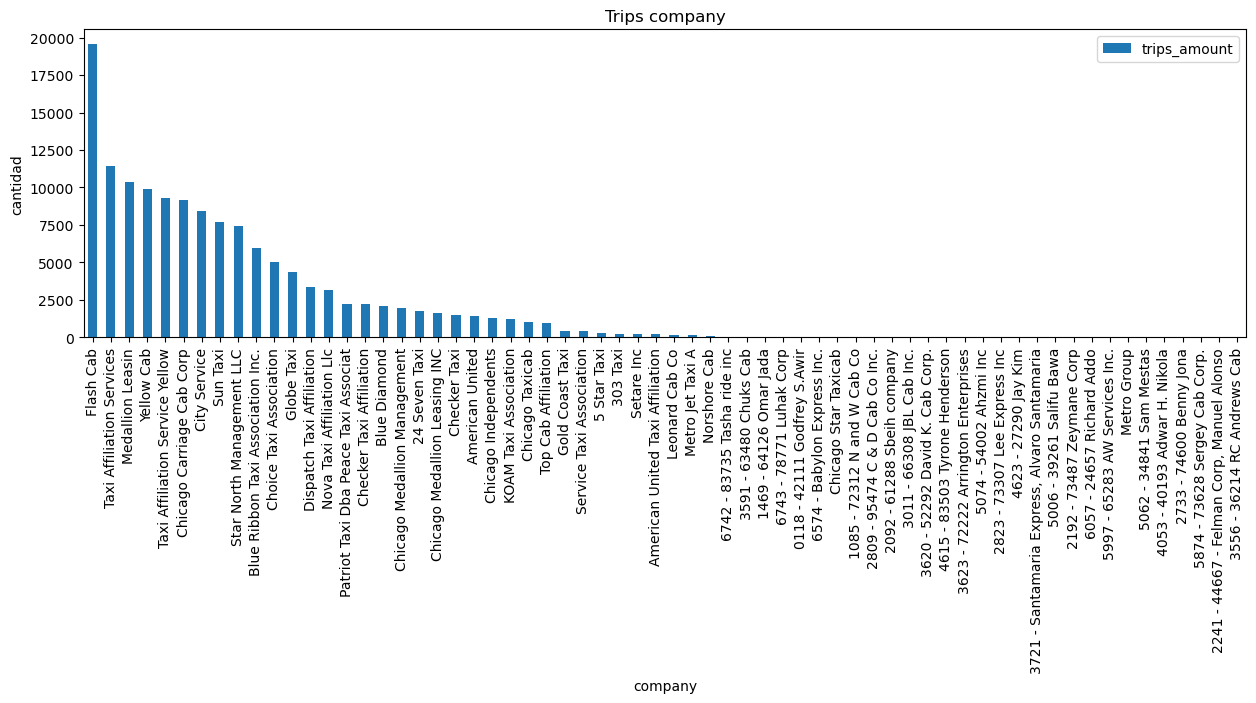

In [5]:
# hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
taxis_trips.plot(kind="bar", title= "Trips company", y= "trips_amount", x= "company_name", ylabel="cantidad", xlabel="company", figsize=(15, 4))

<Axes: title={'center': 'Trips and location'}, xlabel='location', ylabel='cantidad'>

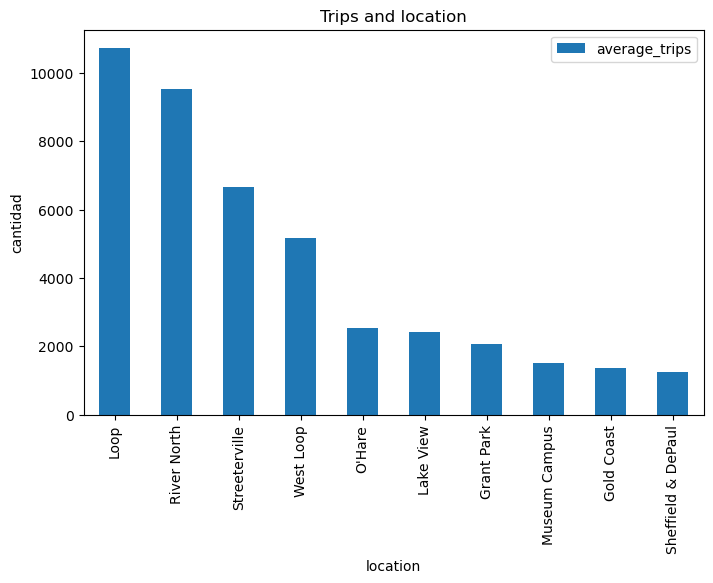

In [6]:
dropoff_amount_main.plot(kind="bar", title= "Trips and location", y= "average_trips", x= "dropoff_location_name", ylabel="cantidad", xlabel="location", figsize=(8,5))

### 4.3 Conclusión

Flash Cab es la compania con la mayor cantidad de viajes realizados y Loop es el lugar con más viajes terminados en Noviembre del 2017. El lugar con menos viajes realizados es Sheffield & DePaul. La mitad de las companias no se visualizan viajes realizados mientras que la otra mitad contiene la mayoría de viajes. Esto podría indicar que la tabla contiene datos de companias que no han sido actualizado y podria representar que están en desuso. La cantidad de viajes finalizados en Loop son alrededor de 10,000 y la compania con mayor cantidad de viajes es de alrededor de 19,000. Pareciera sera que la cantidad inconclusos es mayor que la cantidad de viajes finalizados. 

## Paso 5. Prueba de hipótesis (Python)

### 5.1 análisis de la tabla

Se clasifican las filas con el día sábado para asegurarse que solo contengan dias sábados. Se clasifica en dias buenos y malos para encontrar un numero de viajes y la duración por cada clima. 

In [7]:
loop_airport = pd.read_csv("moved_project_sql_result_07.csv")
loop_airport['start_ts'] = pd.to_datetime(loop_airport['start_ts'])
display(loop_airport)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [8]:
loop_airport_saturdays = loop_airport[loop_airport['start_ts'].dt.dayofweek == 5]
loop_airport_saturdays.groupby("weather_conditions").count()

,start_ts,duration_seconds
weather_conditions,,
Bad,180,180
Good,888,888


In [9]:
loop_airport_saturdays.groupby("weather_conditions")["duration_seconds"].sum().reset_index()

,weather_conditions,duration_seconds
0,Bad,436897.0
1,Good,1775712.0


<Axes: xlabel='weather_conditions', ylabel='duration_seconds'>

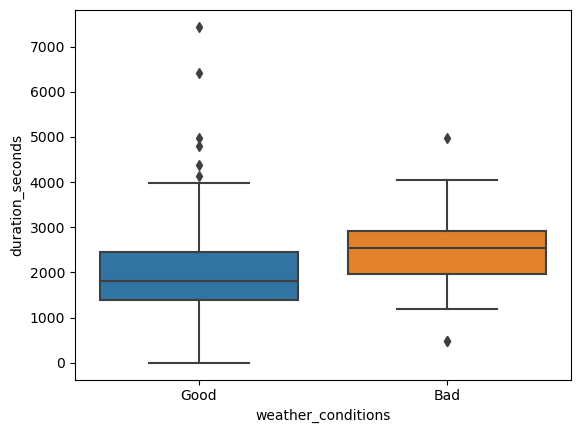

In [12]:
sns.boxplot(x="weather_conditions", y="duration_seconds", data=loop_airport)

### 5.2 Hipótesis

HO: La duración promedio de los viajes desde el Loop hasta el Aereopuerto Internacional O'Hare no tiene variación en los sábados lluviosos
H1: La duración promedio de los viajes desde el Loop hasta el Aereopuerto Internacional O'Hare varía en los sábados lluviosos

La hipótesis nula se estableció diciendo que no existe ninguna variación en cuanto el promedio de viajes realizados, es decir los valores son muy cercanos entre los dos. La hipótesis alternativa dice que los dias lluviosos si afectan el promedio de viajes. El valor alfa se ha establecido en 0.001 porque las medianas no tienen relación con lo que esperaría de los datos en conjunto de los climas. Este valor alpha es más conservador por lo que el riesgo de cometer un error se reduce. 

In [13]:
loop_airport_good= loop_airport_saturdays[loop_airport_saturdays["weather_conditions"]=="Good"].dropna().reset_index()
loop_airport_bad= loop_airport_saturdays[loop_airport_saturdays["weather_conditions"]=="Bad"].dropna().reset_index()

loop_good= loop_airport_good.duration_seconds
loop_bad= loop_airport_bad.duration_seconds

loop_good_bad_h= st.ttest_ind(loop_good, loop_bad,  equal_var = True)
print('p-value: ', loop_good_bad_h.pvalue)

if loop_good_bad_h.pvalue < 0.001:
    print("Se rechaza la hipótesis nula")
elif loop_good_bad_h.pvalue >= 0.001:
    print("No se rechaza la hipótesis nula.")

p-value:  6.517970327099473e-12
Se rechaza la hipótesis nula


Se rechaza la hipotesis nula, lo que significa que existe una variación cuando el clima es malo. Lo que llama la atención es que los viajes se realizan para el aereopuerto, esto significará que tambien cancelan los vuelos por el mal clima o que ellos deciden no volar por el mal clima. Habría que determinar qué es un clima malo y uno bueno. Pero este es un indicador para los conductores porque de esta manera pueden evitar salir a realizar viajes al aereopuerto cuando hay clima malo. 